In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

In [3]:
# Function to initialize random centroids
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

In [4]:
# Function to assign points to the closest centroid
def assign_to_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters.append(cluster_index)
    return np.array(clusters)

In [5]:

# Function to update the centroids based on the assigned points
def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        points_in_cluster = data[clusters == i]
        if len(points_in_cluster) > 0:
            new_centroid = np.mean(points_in_cluster, axis=0)
        else:
            # If no points in the cluster, keep the same centroid
            new_centroid = data[np.random.choice(data.shape[0])]
        centroids.append(new_centroid)
    return np.array(centroids)


In [6]:
# Function to visualize the data and centroids
def plot_clusters(data, clusters, centroids):
    plt.figure(figsize=(8, 6))
    for i in range(len(centroids)):
        points_in_cluster = data[clusters == i]
        plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

In [7]:
# Function to compute the sum of squared distances (SSD) within clusters
def compute_ssd(data, clusters, centroids):
    ssd = 0
    for i in range(len(centroids)):
        points_in_cluster = data[clusters == i]
        ssd += np.sum((points_in_cluster - centroids[i])**2)
    return ssd


In [8]:

# Function to implement the K-Means algorithm
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for iteration in range(max_iterations):
        old_centroids = np.copy(centroids)
        clusters = assign_to_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        if np.all(old_centroids == centroids):
            break
    return centroids, clusters

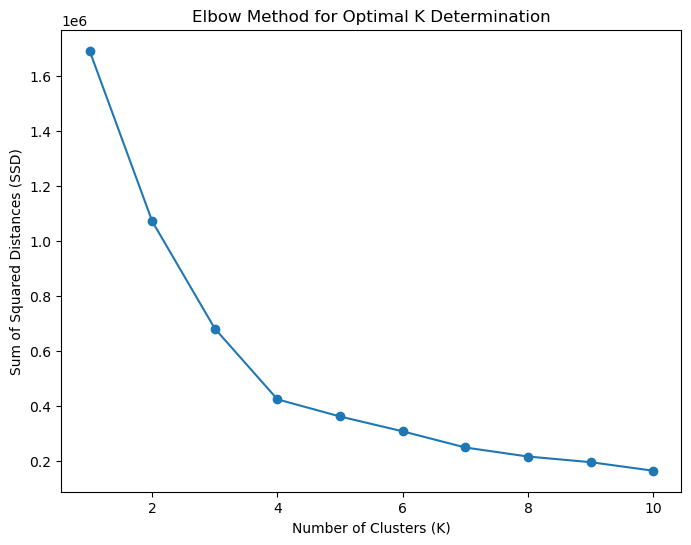

In [9]:
# Generate random data
np.random.seed(42)
data = np.random.randint(1, 100, size=(1000, 2))

# Determine the optimal value of K using the Elbow method
def elbow_method(data, max_k):
    ssd_values = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans(data, k)
        ssd = compute_ssd(data, clusters, centroids)
        ssd_values.append(ssd)
    
    # Plot the Elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), ssd_values, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Distances (SSD)')
    plt.title('Elbow Method for Optimal K Determination')
    plt.show()

elbow_method(data, max_k=10)

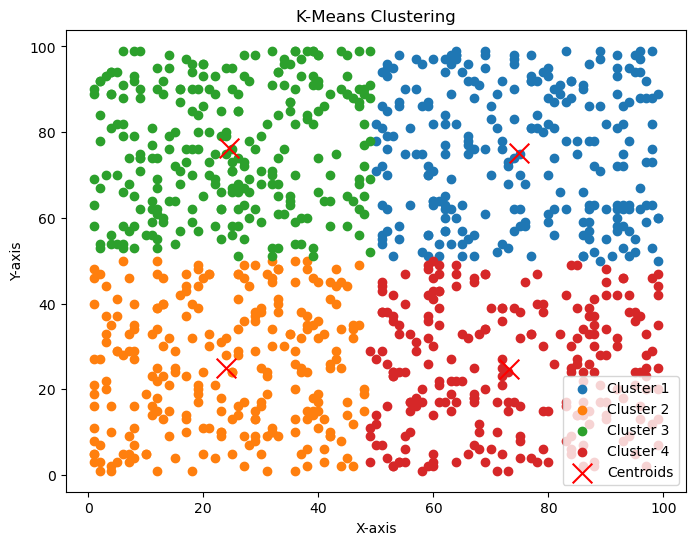

In [10]:
# Perform K-Means clustering with the chosen value of K
k = 4
centroids, clusters = kmeans(data, k)

# Visualize the clusters and centroids
plot_clusters(data, clusters, centroids)